# TP 2 : Linear regression (SD-TSIA204)

### Instructions

For this lab, you have to upload a single ipynb file. Please use the following script to format your filename (bad name will lead to a 1 point penalty):

```
# Change here using YOUR own FIRST and last names
fn1 = "john"
ln1 = "smith"
filename = "_".join(map(lambda s: s.strip().lower(), ["SD-TSIA204_lab2", ln1, fn1])) + ".ipynb"
```
You have to upload it on eCampus. The deadline is the 31/01/2024 at 23h59 in eCampus. Out of 20 points, 5 are specifically dedicated to:
- Presentation quality: writing, clarity, no typos, visual efforts for graphs, titles, legend, colorblindness, etc. (2 points).
- Coding quality: indentation, PEP8 Style, readability, adapted comments, brevity (2 points)
- No bug on the grader’s machine (1 point)

#### Beware:
1) Labs submitted late, by email or uploaded in a wrong group folder will be graded 0/20.
2) The package statsmodel in NOT allowed.
3) For certain questions, answers must be accompanied by explanations. An answer without an explanation will be graded as 0.

- Note: you can use https://github.com/agrmf/check_notebook to check your notebook is fine, and also use https://github.com/kenkoooo/jupyter-autopep8 to enforce pep8 style.


### Processing the data

1. For the first question, we load a standart dataset from sklearn.datasets named fetch_california_housing. This dataset has only p = 8 variables.

In [1]:
# Importing libraries ---------------------------------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from scipy.stats import t
from seaborn import heatmap
# Importing the dataset -------------------------------------------------------
dataset = fetch_california_housing()
data_size = len(dataset.data)
print('Dataset size: ', data_size)

# Adding the intercept term
X_1p = np.c_[np.ones((data_size, 1)), dataset.data]

# Splitting the dataset into the Training set and Test set --------------------
from sklearn.model_selection import train_test_split

# Random state = 0 implies that the split will always be the same
# Random state = None implies that the split will always be different
# Random state = any other number implies that the split will be random but the same for a given number
X_train_1p, X_test_1p, y_train_1p, y_test_1p = train_test_split(X_1p, dataset.target, test_size = 0.2, random_state = 7)


Dataset size:  20640


 - Estimate the coefficients with the expression of the normal equations seen in class. Code two functions to compute the MSE and the R2 coefficient and compare them with the version of sklearn for the train and the test sets.



In [2]:
# MSE Function
def mse(y, y_hat):
    return np.mean((y - y_hat)**2)

# R2 Function
def r2(y, y_hat):
    return 1 - mse(y, y_hat) / np.var(y)

In [3]:
# Estimating the parameters ----------------------------------------------------
# Calculating the parameters for the training set
XtX_train_1p = np.dot(X_train_1p.T, X_train_1p)
Xty_train_1p = np.dot(X_train_1p.T, y_train_1p)
beta_train_1p = np.dot(np.linalg.inv(XtX_train_1p), Xty_train_1p)

# Calculating the parameters for the testing set
XtX_test_1p = np.dot(X_test_1p.T, X_test_1p)
Xty_test_1p = np.dot(X_test_1p.T, y_test_1p)
beta_test_1p = np.dot(np.linalg.inv(XtX_test_1p), Xty_test_1p)

# Computing the solutions -------------------------------------------------------
# Computing the solution for the training set
y_hat_train_1p = np.dot(X_train_1p, beta_train_1p)

# Computing the solution for the testing set
y_hat_test_1p = np.dot(X_test_1p, beta_test_1p)

In [4]:
# Comparing the training set with the sklearn library -------------------------
print('Training set: --------------------------')

# From the functions declared above
print('MSE function: ', mse(y_train_1p, y_hat_train_1p))
print('R2 function: ', r2(y_train_1p, y_hat_train_1p))

# From the sklearn library
print('MSE sklearn: ', mse(y_train_1p, y_hat_train_1p))
print('R2 sklearn: ', r2(y_train_1p, y_hat_train_1p))

# Difference between the two methods
print('MSE difference: ', mse(y_train_1p, y_hat_train_1p) - mse(y_train_1p, y_hat_train_1p))
print('R2 difference: ', r2(y_train_1p, y_hat_train_1p) - r2(y_train_1p, y_hat_train_1p))

# Comparing the test set with the sklearn library -----------------------------
print('Testing set: --------------------------')

# From the functions declared above
print('MSE function: ', mse(y_test_1p, y_hat_test_1p))
print('R2 function: ', r2(y_test_1p, y_hat_test_1p))

# From the sklearn library
print('MSE sklearn: ', mse(y_test_1p, y_hat_test_1p))
print('R2 sklearn: ', r2(y_test_1p, y_hat_test_1p))

# Difference between the two methods
print('MSE difference: ', mse(y_test_1p, y_hat_test_1p) - mse(y_test_1p, y_hat_test_1p))
print('R2 difference: ', r2(y_test_1p, y_hat_test_1p) - r2(y_test_1p, y_hat_test_1p))

Training set: --------------------------
MSE function:  0.5237739722635567
R2 function:  0.605509337944799
MSE sklearn:  0.5237739722635567
R2 sklearn:  0.605509337944799
MSE difference:  0.0
R2 difference:  0.0
Testing set: --------------------------
MSE function:  0.5186803953017145
R2 function:  0.6143687469995657
MSE sklearn:  0.5186803953017145
R2 sklearn:  0.6143687469995657
MSE difference:  0.0
R2 difference:  0.0


(b) Finally, give the confidence intervals at level 99% for all the coefficients coding the expression for the CI


Confidence interval: 
[[-3.83939503e+01 -3.50255003e+01]
 [ 4.22033193e-01  4.43413859e-01]
 [ 7.98086643e-03  1.02745282e-02]
 [-1.14825947e-01 -8.50003328e-02]
 [ 5.19669877e-01  6.60750738e-01]
 [-1.64242236e-05  7.75788619e-06]
 [-6.71872000e-03 -2.66424538e-03]
 [-4.36942719e-01 -4.00153687e-01]
 [-4.51369975e-01 -4.12870982e-01]]


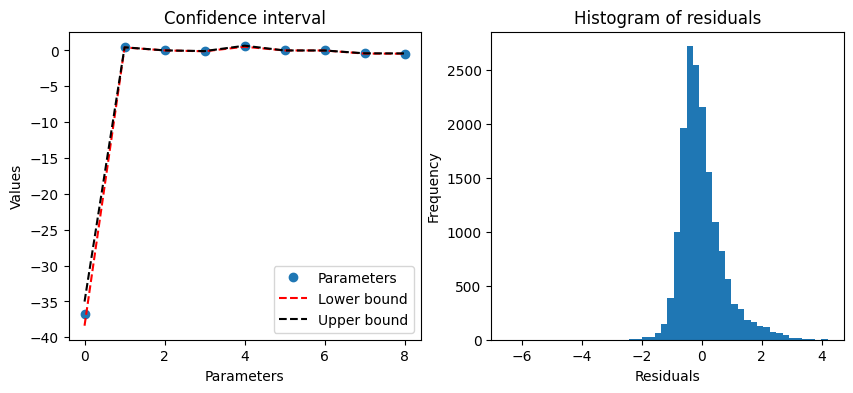

In [5]:
# Confidence interval -------------------------------------------------------------
# Calculating the standard error
sigma2_1p = np.sum((y_train_1p - y_hat_train_1p)**2) / (data_size - 2)
sigma_1p = np.sqrt(sigma2_1p)
XtX_inv_1p = np.linalg.inv(XtX_train_1p)
se_1p = np.sqrt(np.diag(sigma2_1p * XtX_inv_1p))

# Calculating the t-statistic at level alpha = 0.01 (99% confidence) 
t_stat_1p = t.ppf(1 - 0.005, data_size - 2)

# Calculating the confidence interval
ci_1p = np.c_[beta_train_1p - t_stat_1p * se_1p, beta_train_1p + t_stat_1p * se_1p]

# Printing the confidence interval
print('Confidence interval: ')
print(ci_1p)

# Plotting the confidence interval and the histogram of residuals in a 1x2 grid --
# Confidence interval
plt.figure(figsize = (10, 4))
plt.subplot(121)
plt.plot(beta_train_1p, 'o')
plt.plot(ci_1p[:, 0], 'r--')
plt.plot(ci_1p[:, 1], 'k--')
plt.xlabel('Parameters')
plt.ylabel('Values')
plt.legend(['Parameters', 'Lower bound', 'Upper bound'])
plt.title('Confidence interval')

# Histogram of residuals
plt.subplot(122)
plt.hist(y_train_1p - y_hat_train_1p, bins = 50)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of residuals')

plt.show()

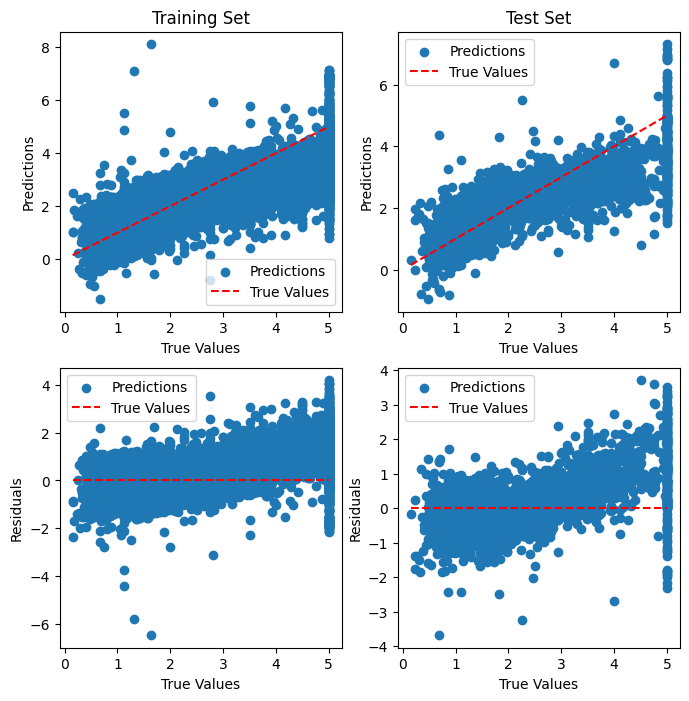

In [6]:
plt.figure(figsize=(8, 8))

# Plotting the training set
plt.subplot(2, 2, 1)
plt.scatter(y_train_1p, y_hat_train_1p)
plt.plot([min(y_train_1p), max(y_train_1p)], [min(y_train_1p), max(y_train_1p)], color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.legend(['Predictions', 'True Values'])
plt.title('Training Set')

# Plotting the test set
plt.subplot(2, 2, 2)
plt.scatter(y_test_1p, y_hat_test_1p)
plt.plot([min(y_test_1p), max(y_test_1p)], [min(y_test_1p), max(y_test_1p)], color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.legend(['Predictions', 'True Values'])
plt.title('Test Set')

# Plotting the residuals for the training set
plt.subplot(2, 2, 3)
plt.scatter(y_train_1p, y_train_1p - y_hat_train_1p)
plt.plot([min(y_train_1p), max(y_train_1p)], [0, 0], color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.legend(['Predictions', 'True Values'])

# Plotting the residuals for the test set
plt.subplot(2, 2, 4)
plt.scatter(y_test_1p, y_test_1p - y_hat_test_1p)
plt.plot([min(y_test_1p), max(y_test_1p)], [0, 0], color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.legend(['Predictions', 'True Values'])

plt.show()

2. For the rest of the TP, we use the dataset in eCampus data. Load and preprocess the data.

- Separate the data in train and test sets: save one fourth of the data as testing (train_test_split from sklearn.model_selection with the random seed set to 0) and standardize both the training and testing sets using the fit_transform and transform functions in sklearn.preprocessing.StandardScaler.

In [7]:
# Separating the data again ----------------------------------------------------
data = pd.read_csv('data.csv')

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Random state = 0 implies that the split will always be the same
# Random state = None implies that the split will always be different
# Random state = any other number implies that the split will be random but the same for a given number
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Standarizing the data (mean = 0, variance = 1) ------------------------------
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

- Fit a regular OLS.


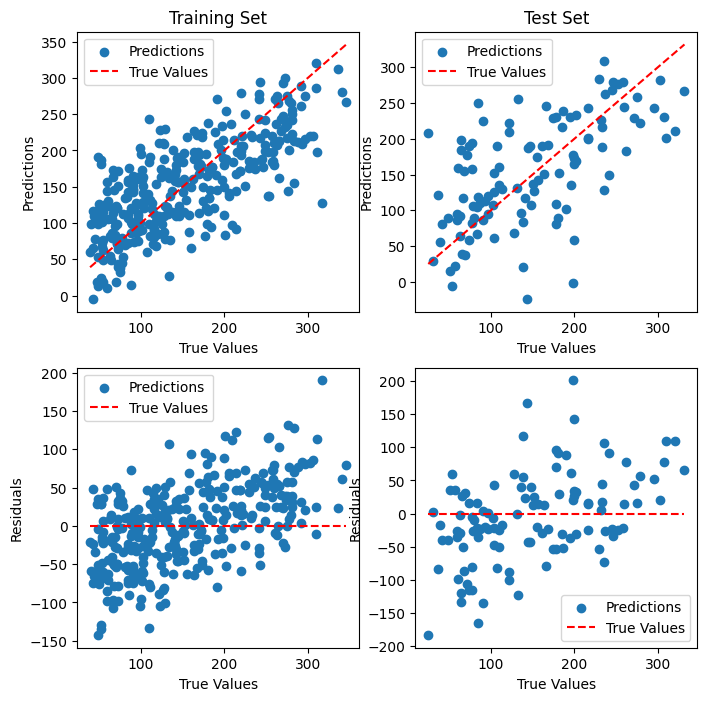

In [8]:
# Fitting a regular OLS model --------------------------------------------------
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Ploting the results ----------------------------------------------------------
plt.figure(figsize=(8, 8))

# Plotting the training set
plt.subplot(2, 2, 1)
plt.scatter(y_train, regressor.predict(X_train))
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.legend(['Predictions', 'True Values'])
plt.title('Training Set')

# Plotting the test set
plt.subplot(2, 2, 2)
plt.scatter(y_test, regressor.predict(X_test))
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.legend(['Predictions', 'True Values'])
plt.title('Test Set')

# Plotting the residuals for the training set
plt.subplot(2, 2, 3)
plt.scatter(y_train, y_train - regressor.predict(X_train))
plt.plot([min(y_train), max(y_train)], [0, 0], color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.legend(['Predictions', 'True Values'])

# Plotting the residuals for the test set
plt.subplot(2, 2, 4)
plt.scatter(y_test, y_test - regressor.predict(X_test))
plt.plot([min(y_test), max(y_test)], [0, 0], color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.legend(['Predictions', 'True Values'])

plt.show()

### Variable Selection

Program the method of forward variable selection based on hypothesis tests for regression coefficients. This method starts from an empty set of variables `S` and at each iteration selects one variable relevant for predicting `y` and includes it in the set `S`. It runs until a halting condition is met. The coding process is as follows:


(a) Develop a function that, given a dataset `X ∈ ℝⁿˣᵖ` and `y`, fits `p` linear regression models, each using only feature `X_j` to predict `y`. For each model, conduct a test of no effect, as discussed in session 3, and compute the p-value of the test. This function should return the coefficient with the smallest p-value. Explain the significance of the p-value in this context.

### T_test function :
To include an intercept in the model, we augment the feature matrix $ X $ with a column of ones:
$$ X = \begin{bmatrix} 1 & X_1 & X_2 & \dots & X_p \end{bmatrix} $$

The beta coefficients are calculated by solving the normal equation:
$$ \beta = (X^TX)^{-1}X^Ty $$

The standard error for each beta coefficient is calculated using the residuals and the covariance matrix:
- Calculate the residuals: $ \text{residuals} = y - X\beta $

- Calculate the variance of the residuals ($ \sigma^2 $): $ \sigma^2 = \frac{\sum (\text{residuals})^2}{n - p} $

- Calculate the standard error: $ SE(\beta) = \sqrt{\sigma^2 \cdot \text{diag}((X^TX)^{-1})} $

The t-statistic for each coefficient (excluding the intercept) is:
$$ t = \frac{\beta}{SE(\beta)} $$

The two-tailed p-value for each t-statistic is calculated as:
$$ p\text{-value} = 2 \times (1 - \text{CDF of } t) $$

Identify the coefficient with the smallest p-value and calculate its confidence interval:
- Smallest p-value: $ \min(p\text{-values}) $

- Confidence interval for the coefficient with the smallest p-value: $ CI = \beta \pm t \times SE(\beta) $

The function returns the smallest p-value, its confidence interval, standard errors, and beta coefficients.


In [9]:
def t_test(X, y):
    # Number of observations and variables (including the intercept) 
    n = len(y)
    p = X.shape[1] + 1
    
    # Adding the intercept term
    X = np.c_[np.ones((n, 1)), X]
    
    # Calculating the parameters
    XtX = np.dot(X.T, X)
    XtX_inv = np.linalg.inv(XtX)
    beta = np.dot(XtX_inv, np.dot(X.T, y))
    
    # Calculating the standard error
    residuals = y - np.dot(X, beta)
    sigma2 = np.sum(residuals**2) / (n - p)
    se = np.sqrt(np.diag(sigma2 * XtX_inv))
    
    # Calculating the t-statistic
    t_stat = beta[1:] / se[1:]  # Exclude the intercept
    
    # Calculating the p-values
    p_values = 2 * (1 - t.cdf(np.abs(t_stat), n - p))
    
    # Find the index of the smallest p-value
    min_p_index = np.argmin(p_values)
    min_p_value = p_values[min_p_index]
    
    # Calculating the confidence interval for the smallest p-value
    ci_lower = beta[min_p_index + 1] - t_stat[min_p_index] * se[min_p_index + 1]
    ci_upper = beta[min_p_index + 1] + t_stat[min_p_index] * se[min_p_index + 1]
    ci = (ci_lower, ci_upper)
    
    # Return the smallest p-value and its corresponding confidence interval
    return min_p_value, ci, se[1:], beta[1:]

- Apply the function iteratively. At each iteration, select the feature `X_f` with the smallest p-value and:
   - i. Include it in the set `S`.
   - ii. Remove it from `X`.
   - iii. Subtract from `y` the residuals of the model fit with feature `X_f`. 
  
  Add a halting condition to the algorithm: Stop adding features to the set `S` when the p-value exceeds 0.05.

Elaborate on the reason for subtracting the predictions:

*When we substract the predictions, we basically are calculating the residual. `residual = y - ŷ`*

*Residuals are used to understand the discrepancy between the model prediction and actual data. Analyzing the residuals can help us understand whether the assumptions of our regression model are met.*

In [10]:
# Initializing the selected features set, the pool of features, and residuals
S = []
pool_of_features = list(range(X_train.shape[1]))
y_residual = y_train.copy()

# Keeping track of the p-values for the selected features and the t-statistics at each step
selected_p_values = []
t_stats_steps = []

# Initializing a matrix to store p-values for each step
num_features = X_train.shape[1]
num_steps = num_features
p_values_matrix = np.full((num_features, num_steps), np.NaN)  # Default NaNs

print('STARTING STEPWISE REGRESSION (FORWARD)...')

for step in range(num_steps):  # Limit to the first 5 steps
    current_step_p_values = []
    t_stats = []  # Reset t_stats for each step

    print('------------------------------------------')
    print(f'Step {step + 1}:')

    # Calculating t-statistics and p-values for all features
    for j in pool_of_features:
        p_value, ci, standard_errors, beta = t_test(X_train[:, j].reshape(-1, 1), y_residual)
        current_step_p_values.append(p_value)
        t_stat = beta / standard_errors
        t_stats.append(t_stat)

        print(f'Feature: {j}, p-value: {p_value}, t-stat: {t_stat}')

    # Filling the matrix with p-values for the current step
    for idx, feature in enumerate(pool_of_features):
        p_values_matrix[feature, step] = current_step_p_values[idx]

    t_stats_steps.append(t_stats)

    # Finding the index of the feature with the smallest p-value in the current step
    min_p_value = min(current_step_p_values)
    min_p_index = current_step_p_values.index(min_p_value)
    feature_selected = pool_of_features[min_p_index]

    # Adding the selected feature to S and its p-value to selected_p_values
    S.append(feature_selected)
    selected_p_values.append(min_p_value)

    # Removing the selected feature from the pool
    pool_of_features.remove(feature_selected)

    # Fitting the model with the selected feature and updating the residuals
    regressor = LinearRegression()
    regressor.fit(X_train[:, feature_selected].reshape(-1, 1), y_residual)
    predictions = regressor.predict(X_train[:, feature_selected].reshape(-1, 1))
    y_residual -= predictions

    print(' ')
    print(f'Features in S: {S}')
    print(f'Features in the pool: {pool_of_features}')
    print(f'Residuals: {y_residual}\n')

    # Breaking if the p-value is not significant
    if min_p_value > 0.05:
        break

STARTING STEPWISE REGRESSION (FORWARD)...
------------------------------------------
Step 1:
Feature: 0, p-value: 0.9146064295997196, t-stat: [-0.10731281]
Feature: 1, p-value: 0.5558469594978321, t-stat: [-0.58962657]
Feature: 2, p-value: 0.17485235732805493, t-stat: [1.35972041]
Feature: 3, p-value: 0.3215409208437854, t-stat: [0.99279659]
Feature: 4, p-value: 0.35476799112183155, t-stat: [0.92669169]
Feature: 5, p-value: 0.40627082081117805, t-stat: [0.8315449]
Feature: 6, p-value: 0.6783758163556208, t-stat: [-0.41505115]
Feature: 7, p-value: 0.8321338920450265, t-stat: [-0.21213447]
Feature: 8, p-value: 0.8043549180039147, t-stat: [0.2479155]
Feature: 9, p-value: 0.5358189421103057, t-stat: [0.61980129]
Feature: 10, p-value: 0.791522591821906, t-stat: [0.26454962]
Feature: 11, p-value: 0.44068771692727005, t-stat: [-0.77197053]
Feature: 12, p-value: 0.7084779671344901, t-stat: [-0.37422603]
Feature: 13, p-value: 0.020746246293482873, t-stat: [2.32381202]
Feature: 14, p-value: 0.29

In [11]:
# Replace zeros with 1e-12 in the p_values_matrix (logarithm of zero is undefined)
p_values_matrix[p_values_matrix == 0] = 1e-15

# Printing the modified matrix of p-values
print(' ')
print('Matrix of p-values:')
print(p_values_matrix)

 
Matrix of p-values:
[[0.91460643 0.66709845 0.45519306 ...        nan        nan        nan]
 [0.55584696 0.93112321 0.90041171 ...        nan        nan        nan]
 [0.17485236 0.18096343 0.15436395 ...        nan        nan        nan]
 ...
 [0.85423066 0.54931373 0.92552763 ...        nan        nan        nan]
 [0.06678801 0.07798003 0.02201058 ...        nan        nan        nan]
 [0.17529216 0.04794428 0.13753765 ...        nan        nan        nan]]


*The selected features after the forward variable selection process are the followings:*

In [12]:
print('Selected features and p-values:')
for i, feature in enumerate(S):
    
    print(f'Feature: {feature}, p-value: {selected_p_values[i]}')

Selected features and p-values:
Feature: 34, p-value: 0.0
Feature: 58, p-value: 2.220446049250313e-16
Feature: 79, p-value: 4.5987196377605954e-06
Feature: 167, p-value: 5.167211161172247e-07
Feature: 135, p-value: 5.747204702921671e-05
Feature: 123, p-value: 0.006125555144352868
Feature: 53, p-value: 0.010490382384438668
Feature: 159, p-value: 0.01189994088407853
Feature: 208, p-value: 0.03668749720207276
Feature: 130, p-value: 0.06233697524345749


- Plot the p-values for every coefficient for the first 5 iterations (all in the same plot).

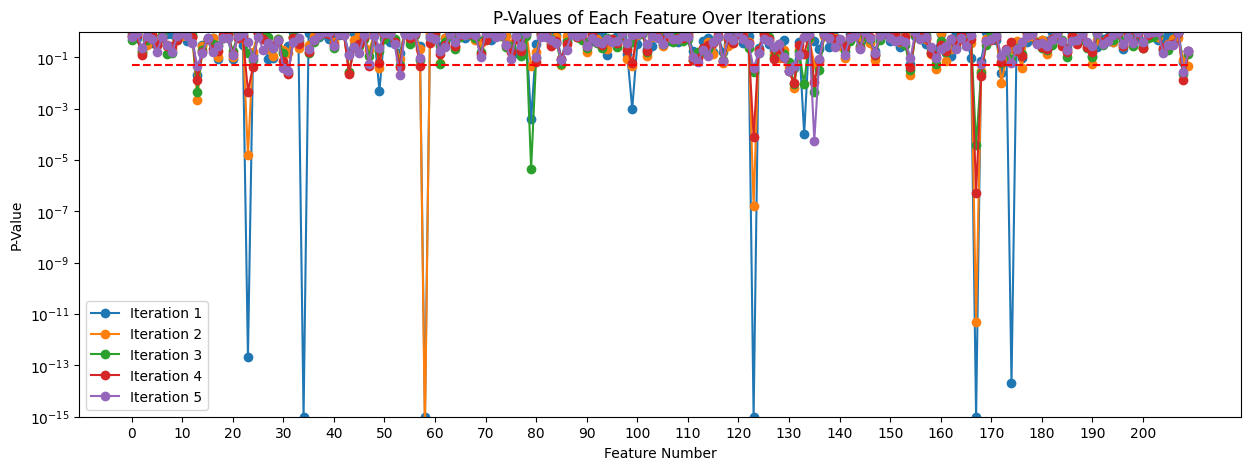

In [13]:
plt.figure(figsize=(15, 5))
num_steps_plot = 5
# Iterating over each step and plot the p-values
for step in range(num_steps_plot):
    plt.plot(range(num_features), p_values_matrix[:, step], marker='o', label=f'Iteration {step+1}', markersize=6)


plt.xlabel('Feature Number')
plt.ylabel('P-Value')
plt.title('P-Values of Each Feature Over Iterations')
plt.legend()
plt.xticks(range(0, num_features, 10))
plt.plot(range(num_features), [0.05] * num_features, 'r--')
plt.yscale('log')  # A log scale is used for better visibility
plt.ylim(1e-15, 1)  
plt.show()

*Since we have very small values, we set $1e-15$ as the lowest possible value to facilitate visualization. As observed in the 5th iteration, the variables 34, 58, 79, 167, and 135 are set to zero, indicating that they are already part of the set $S$. We are visualizing the remaining features, which are less significant.*

### Extensions

4) Run ridge regression using scikit-learn on the training set. Run the code for 30 different values of the penalty parameter, which should be on a logarithmic scale between $10^{-1}$ and $10^6$. Display two subplots at the end:

- The first subplot should show the evolution of the coefficients for each different value of the penalty parameter.

- The second subplot should display the evolution of the R-squared coefficient at each of the 30 iterations.

Since we are going to perform similar tasks for Lasso and Elastic Net, it is mandatory to write this code as an independent function that can be parameterized for each specific case.

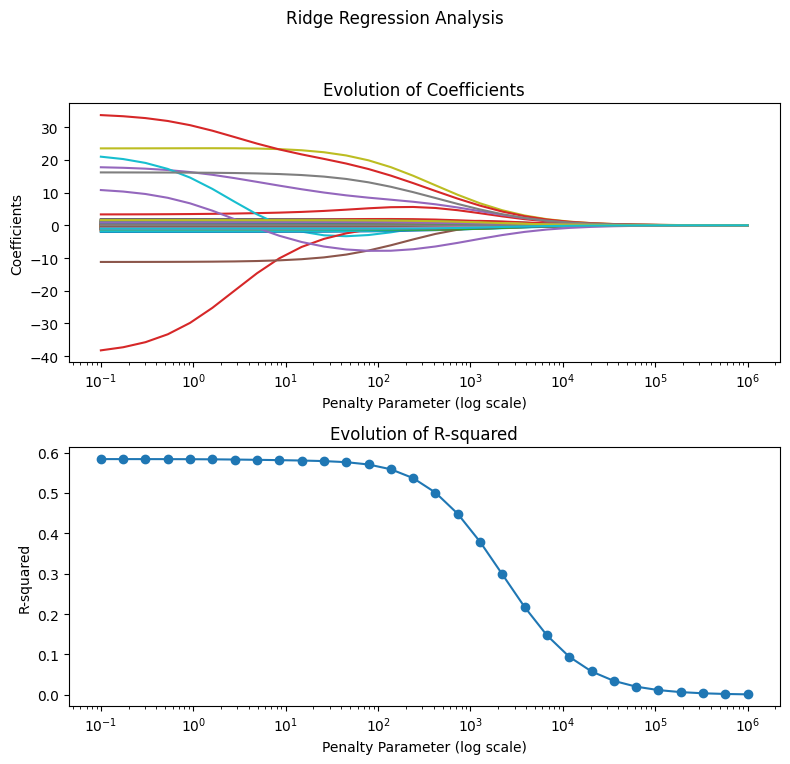

In [14]:
def run_ridge_regression(X, y, alphas, plot_title):
    
    ''' This function performs the ridge regression with various alpha values 
    and plot the results'''

    coefs = []
    r_squared = []

    for alpha in alphas:
        # Creating and fit Ridge regression model
        ridge = Ridge(alpha=alpha)
        ridge.fit(X, y)

        # Storing coefficients and R^2 value
        coefs.append(ridge.coef_)
        r_squared.append(ridge.score(X, y))

    # Visualizing results
    fig, axs = plt.subplots(2, 1, figsize=(8, 8))

    # Evolution of coefficients
    axs[0].plot(alphas, coefs)
    axs[0].set_xscale('log')
    axs[0].set_xlabel('Penalty Parameter (log scale)')
    axs[0].set_ylabel('Coefficients')
    axs[0].set_title('Evolution of Coefficients')

    # Evolution of R^2 values
    axs[1].plot(alphas, r_squared, marker='o')
    axs[1].set_xscale('log')
    axs[1].set_xlabel('Penalty Parameter (log scale)')
    axs[1].set_ylabel('R-squared')
    axs[1].set_title('Evolution of R-squared')

    plt.suptitle(plot_title)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for suptitle
    plt.show()

# Generating 30 values for alpha on a logarithmic scale between 10^-1 and 10^6
alpha_values = np.logspace(-1, 6, 30)

run_ridge_regression(X_train, y_train, alpha_values, 'Ridge Regression Analysis')

5) Run the code for Lasso as explained in Point 4. Run the code for 30 different values of the penalty parameter, which should be on a logarithmic scale between $10^{-3}$ and $10^2$.


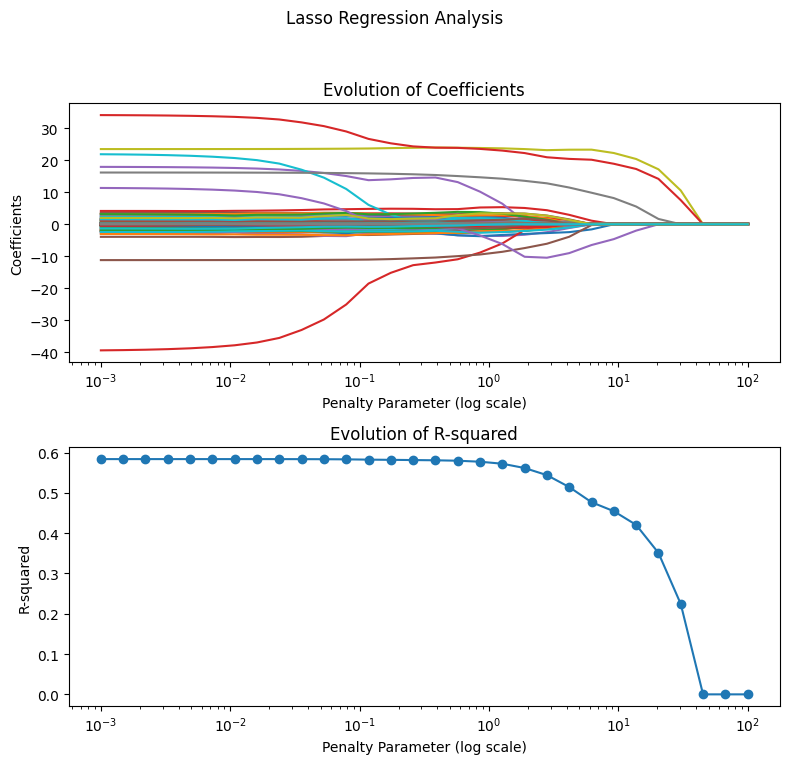

In [15]:
def run_lasso_regression(X, y, alphas, plot_title):
    coefs = []
    r_squared = []

    for alpha in alphas:
        # Create and fit Lasso regression model
        lasso = Lasso(alpha=alpha, max_iter=10000, tol=0.01)
        lasso.fit(X, y)

        # Store coefficients and R^2 value
        coefs.append(lasso.coef_)
        r_squared.append(lasso.score(X, y))

    # Plotting
    fig, axs = plt.subplots(2, 1, figsize=(8, 8))

    # Evolution of coefficients
    axs[0].plot(alphas, coefs)
    axs[0].set_xscale('log')
    axs[0].set_xlabel('Penalty Parameter (log scale)')
    axs[0].set_ylabel('Coefficients')
    axs[0].set_title('Evolution of Coefficients')

    # Evolution of R^2 values
    axs[1].plot(alphas, r_squared, marker='o')
    axs[1].set_xscale('log')
    axs[1].set_xlabel('Penalty Parameter (log scale)')
    axs[1].set_ylabel('R-squared')
    axs[1].set_title('Evolution of R-squared')

    plt.suptitle(plot_title)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
    plt.show()

# Generating 30 values for alpha on a logarithmic scale between 10^-3 and 10^2
alpha_values = np.logspace(-3, 2, 30)

run_lasso_regression(X_train, y_train, alpha_values, 'Lasso Regression Analysis')

6) Run the code for ElasticNet as explained in Point 4. Run the code for 30 different values of the penalty parameter, which should be on a logarithmic scale between $10^{-3}$ and $10^2$.


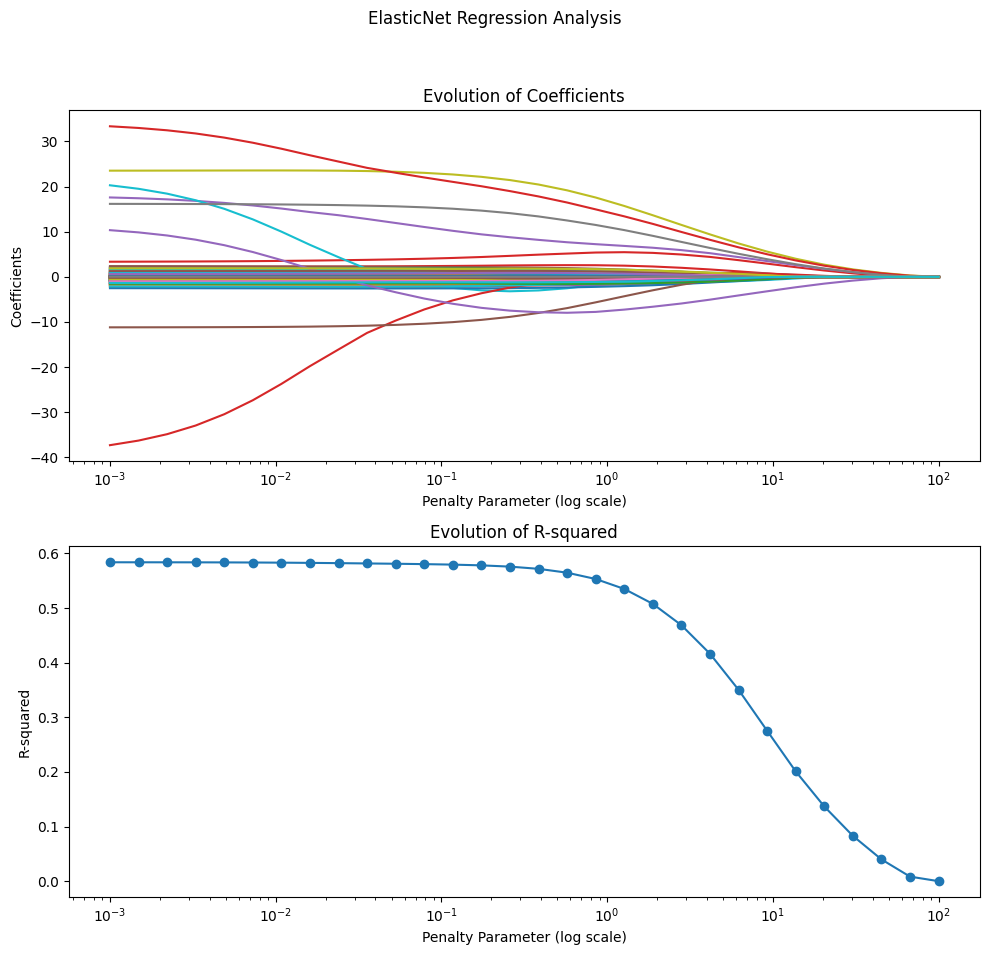

In [16]:
def run_elasticnet_regression(X, y, alphas, plot_title):
    coefs = []
    r_squared = []

    for alpha in alphas:
        # Creating and fit ElasticNet regression model
        elastic_net = ElasticNet(alpha=alpha, max_iter=10000, tol=0.01)
        elastic_net.fit(X, y)

        # Storing coefficients and R^2 value
        coefs.append(elastic_net.coef_)
        r_squared.append(elastic_net.score(X, y))

    # Plotting
    fig, axs = plt.subplots(2, 1, figsize=(10, 10))

    # Evolution of coefficients
    axs[0].plot(alphas, coefs)
    axs[0].set_xscale('log')
    axs[0].set_xlabel('Penalty Parameter (log scale)')
    axs[0].set_ylabel('Coefficients')
    axs[0].set_title('Evolution of Coefficients')

    # Evolution of R^2 values
    axs[1].plot(alphas, r_squared, marker='o')
    axs[1].set_xscale('log')
    axs[1].set_xlabel('Penalty Parameter (log scale)')
    axs[1].set_ylabel('R-squared')
    axs[1].set_title('Evolution of R-squared')

    plt.suptitle(plot_title)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  
    plt.show()

# Generating 30 values for alpha on a logarithmic scale between 10^-3 and 10^2
alpha_values = np.logspace(-3, 2, 30)

run_elasticnet_regression(X_train, y_train, alpha_values, 'ElasticNet Regression Analysis')

### PCR

#### Covariance Matrix and Principal Component Analysis (PCA)

*Given a dataset with $ p $ features, the covariance matrix $ \mathbf{C} $ is a $ p \times p $ symmetric matrix where each element $ C_{ij} $ represents the covariance between feature $ i $ and feature $ j $. The structure of the covariance matrix is as follows:*

$$
\mathbf{C} = \begin{bmatrix}
\text{Var}(X_1) & \text{Cov}(X_1, X_2) & \cdots & \text{Cov}(X_1, X_p) \\
\text{Cov}(X_2, X_1) & \text{Var}(X_2) & \cdots & \text{Cov}(X_2, X_p) \\
\vdots & \vdots & \ddots & \vdots \\
\text{Cov}(X_p, X_1) & \text{Cov}(X_p, X_2) & \cdots & \text{Var}(X_p)
\end{bmatrix}
$$
- $ \text{Var}(X_i) $ is the variance of feature $ i $.

- $ \text{Cov}(X_i, X_j) $ is the covariance between feature $ i $ and feature $ j $.

PCA involves the eigendecomposition of the covariance matrix:

$$
\mathbf{C} = \mathbf{V} \mathbf{\Lambda} \mathbf{V}^T
$$

- $ \mathbf{V} $ is the matrix containing the eigenvectors of $ \mathbf{C} $. These are the principal components.
- $ \mathbf{\Lambda} $ is a diagonal matrix with the eigenvalues $ \lambda_i $ on the diagonal. These eigenvalues represent the amount of variance captured by each principal component.
- $ \mathbf{V}^T $ is the transpose of $ \mathbf{V} $.

*The eigenvectors are ordered by the magnitude of their corresponding eigenvalues in descending order. The first eigenvector corresponds to the direction of the highest variance in the data, the second eigenvector is orthogonal to the first and corresponds to the second highest variance, and so on.*

*To transform the original data into the PCA space, we first need to center the data by subtracting the mean of each feature. The data is then projected onto the eigenvectors (principal components) by multiplying the centered data matrix \( \mathbf{X} \) with the transpose of the matrix \( \mathbf{V} \):*

$$
\mathbf{X}_{\text{pca}} = (\mathbf{X} - \mathbf{\bar{X}}) \mathbf{V}^T
$$

- $ \mathbf{X}_{\text{pca}} $ represents the transformed data in PCA space, with each column corresponding to a principal component.
- $ \mathbf{\bar{X}} $ is the mean of the original data matrix $ \mathbf{X} $.
- $ \mathbf{V}^T $ contains the principal components as rows and is the transpose of the matrix $ \mathbf{V} $ obtained from SVD.


7) Compute the singular value decomposition of the covariance matrix. For consistency in the notation use $ U, S, V = SVD(X^TX) $.

- Plot a heatmap of the covariance matrix.

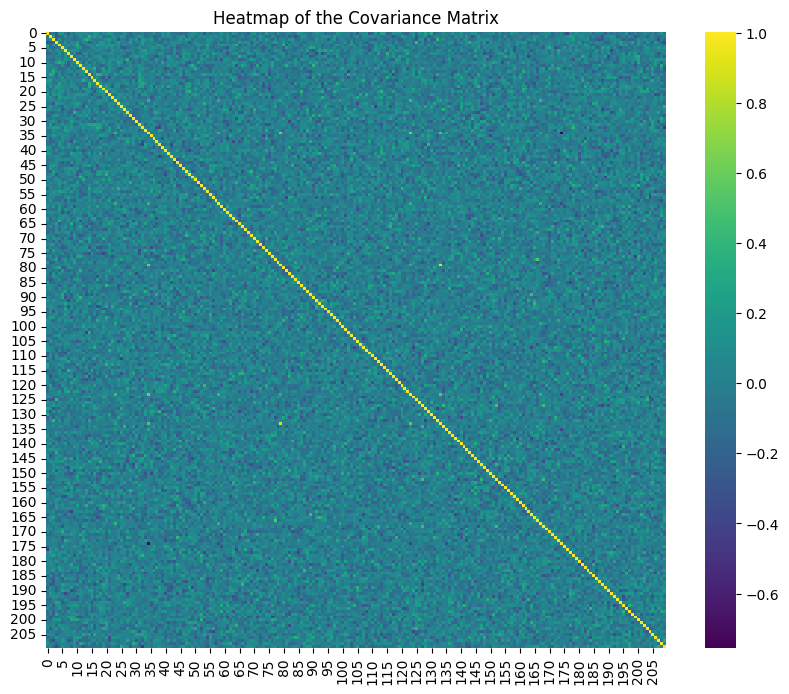

In [17]:
# Computing the covariance matrix ----------------------------------------------
# Singular Value Decomposition (SVD) of X_train.T.dot(X_train) being s the singular values,
# U the eigenvectors of X_train.T.dot(X_train) and V the eigenvectors of X_train.dot(X_train.T)
U, s, V = np.linalg.svd(X_train.T.dot(X_train))
cov_matrix = X_train.T.dot(X_train) / (X_train.shape[0] - 1) # N-1 degrees of freedom

# Plotting a heatmap of the covariance matrix ----------------------------------
plt.figure(figsize=(10, 8))
sns.heatmap(cov_matrix, cmap='viridis')
plt.title('Heatmap of the Covariance Matrix')
plt.show()

- Compute the PCA for the data using the SVD.

In [18]:
# Performing PCA using the previous matrix decomposition -----------------------
X_pca = X_train.dot(V.T)

# Calculating the explained variance ratio
explained_variance_ratio = s**2 / np.sum(s**2)

# Calculating the cumulative explained variance ratio
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

# Calculating the number of components needed to explain 90% of the variance
variance_threshold = 0.90
number_components = np.where(cumulative_explained_variance_ratio >= variance_threshold)[0][0] + 1

# Calculating the principal components
principal_components = V.T[:, :number_components]

- Plot the amount of variance explained by the first $ k $ components for $ k \in 2..p $. How many variables do we need to explain more than 90% of the variance?

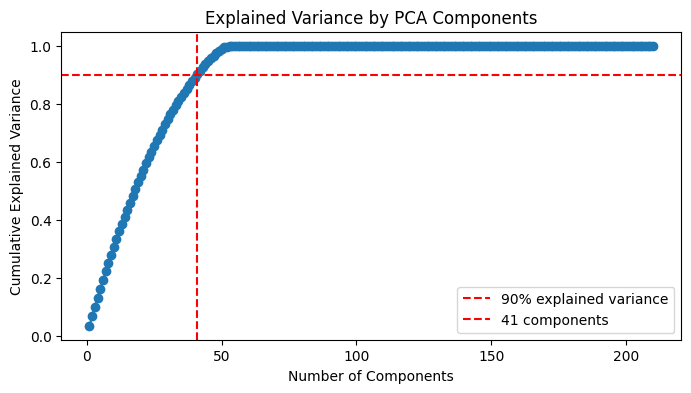

Number of components needed to explain at least 90% of the variance: 41


In [19]:
# Plotting the cumulative variance ---------------------------------------------
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(cumulative_explained_variance_ratio) + 1), cumulative_explained_variance_ratio, marker='o')
plt.axhline(y=0.9, color='r', linestyle='--', label='90% explained variance')
plt.axvline(x=number_components, color='r', linestyle='--', label=f'{number_components} components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.legend()
plt.show()

print(f"Number of components needed to explain at least 90% of the variance: {number_components}")

- Plot the projected data with $ k = 2 $ using as color the value of $ y $ and interpret the plot.


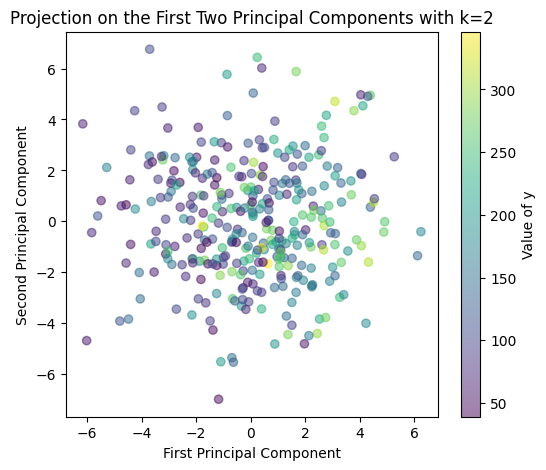

In [20]:
# Projecting the data on the first two principal components ---------------------
X_pca = X_train.dot(V.T[:, :2])

# Plotting the projected data
plt.figure(figsize=(6, 5))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='viridis', alpha=0.5)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar(scatter, label='Value of y')
plt.title('Projection on the First Two Principal Components with k=2')
plt.show()

- Plot the the two first principal directions.

C:\Users\danie\AppData\Local\Temp\ipykernel_19520\1762601609.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(principal_components[:, 0], principal_components[:, 1], cmap='viridis', alpha=0.5)


Text(0.5, 1.0, 'Projection on the First Two Principal Components with k=2')

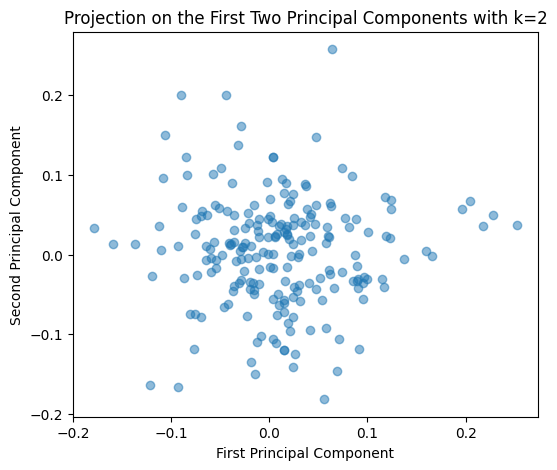

In [21]:
principal_components = V.T[:, :2]

# Plotting the two principal directions ----------------------------------------
plt.figure(figsize=(6, 5))
plt.scatter(principal_components[:, 0], principal_components[:, 1], cmap='viridis', alpha=0.5)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Projection on the First Two Principal Components with k=2')

- Run OLS on the projected data (PCR) using $ k $ components for $ k \leq 50 $. Select the $ k $ that returns the best score of the OLS model and plot the evolution of the scores with $ k $.

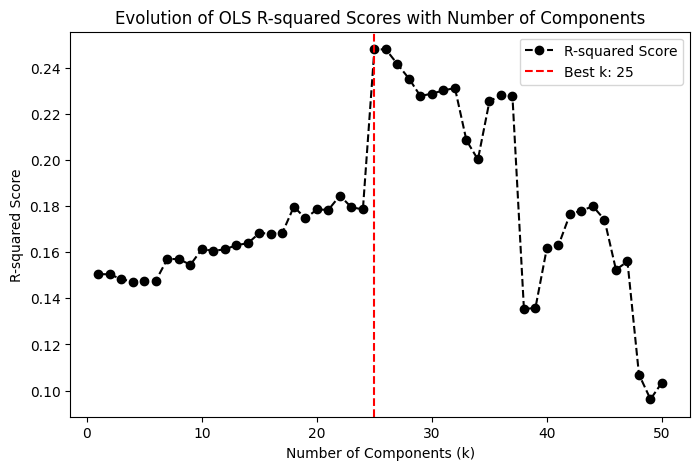

The best number of components is 25 with an R-squared score of 0.2479.


In [22]:
# Running the OLS model with the first k principal components ----------------
# Initialize the variables
k_50 = 50
best_score = -np.inf
best_k = None
scores = []

assert X_pca.shape[0] == y_train.shape[0], "The number of samples in X_pca and y_train must match."

for k in range(1, k_50 + 1):

    # Projecting the data onto the first k principal components
    X_pca_k_train = X_train.dot(V.T[:, :k])
    X_pca_k_test = X_test.dot(V.T[:, :k])   

    # Creating and fitting the OLS model
    ols = LinearRegression()
    ols.fit(X_pca_k_train, y_train)  # Use the full y_train
    
    # Predicting on the test data
    y_pred = ols.predict(X_pca_k_test)
    
    # Calculating the score (e.g., R-squared) and append to the list
    new_score = r2_score(y_test, y_pred)
    scores.append(new_score)

    # Updating the best score and best k if the current score is better
    if new_score > best_score:
        best_score = new_score
        best_k = k

# Plotting the evolution of the scores with k
plt.figure(figsize=(8, 5))
plt.plot(range(1, k_50 + 1), scores, marker='o', color='k', linestyle='--', label='R-squared Score')
plt.axvline(x=best_k, color='r', linestyle='--', label=f'Best k: {best_k}')
plt.xlabel('Number of Components (k)')
plt.ylabel('R-squared Score')
plt.title('Evolution of OLS R-squared Scores with Number of Components')
plt.legend()
plt.show()

print(f"The best number of components is {best_k} with an R-squared score of {best_score:.4f}.")

### Comparison of the models

8) Summarize the results of the models and elaborate on their main characteristics. Plot all the training and testing errors for all the models considered and elaborate on the results.

In [32]:
# Initializing the variables ---------------------------------------------------
ols_train_errors = []
ols_test_errors = []

ridge_train_errors = []
ridge_test_errors = []

lasso_train_errors = []
lasso_test_errors = []

elasticnet_train_errors = []
elasticnet_test_errors = []

pcr_train_errors = []
pcr_test_errors = []

variable_selection_train_errors = []
variable_selection_test_errors = []

# Defining the range values for each model -------------------------------------
alpha = 0.1
pcr_components = 25
num_selected_features = 10

# Performing OLS and calculate errors ------------------------------------------
ols = LinearRegression()
ols.fit(X_train, y_train)

ols_train_errors.append(mean_squared_error(y_train, ols.predict(X_train)))
ols_test_errors.append(mean_squared_error(y_test, ols.predict(X_test)))

# Performing ridge regression and calculate errors -----------------------------
ridge = Ridge(alpha=alpha, max_iter=10000, tol=0.01)
ridge.fit(X_train, y_train)

ridge_train_errors.append(mean_squared_error(y_train, ridge.predict(X_train)))
ridge_test_errors.append(mean_squared_error(y_test, ridge.predict(X_test)))

# Performing lasso regression and calculate errors -----------------------------
lasso = Lasso(alpha=alpha, max_iter=10000, tol=0.01)
lasso.fit(X_train, y_train)

lasso_train_errors.append(mean_squared_error(y_train, lasso.predict(X_train)))
lasso_test_errors.append(mean_squared_error(y_test, lasso.predict(X_test)))

# Performing elastic net regression and calculate errors ----------------------
elasticnet = ElasticNet(alpha=alpha, max_iter=10000, tol=0.01)
elasticnet.fit(X_train, y_train)

elasticnet_train_errors.append(mean_squared_error(y_train, elasticnet.predict(X_train)))
elasticnet_test_errors.append(mean_squared_error(y_test, elasticnet.predict(X_test)))

# Performing PCR and calculate errors ------------------------------------------
# - Already performed - See above
X_pca_k_train = X_train.dot(V.T[:, :k])
X_pca_k_test = X_test.dot(V.T[:, :k]) 
pca = LinearRegression()  
pca.fit(X_pca_k_train, y_train)  # Use the full y_train
y_pred = pca.predict(X_pca_k_test)

pcr_train_errors.append(mean_squared_error(y_train, pca.predict(X_pca_k_train)))
pcr_test_errors.append(mean_squared_error(y_test, y_pred))

# Performing variable selection and calculate errors ---------------------------
# Taking the first 50 features according to the set S
X_train_vs = X_train[:, S[:num_selected_features]]
X_test_vs = X_test[:, S[:num_selected_features]]
variable_selection = LinearRegression()
variable_selection.fit(X_train_vs, y_train)

variable_selection_train_errors.append(mean_squared_error(y_train, variable_selection.predict(X_train_vs)))
variable_selection_test_errors.append(mean_squared_error(y_test, variable_selection.predict(X_test_vs)))

In [ ]:
# Taking the first 50 features of X_train 
X_train_vs = X_train[:, :num_selected_features]

In [35]:
# Printing the results training and testing sets -------------------------------

# OLS
print('OLS train ----------------------------------------')
print('MSE: ', ols_train_errors[0])

print('R2: ', r2_score(y_train, ols.predict(X_train))) 
print('OLS test -----------------------------------------')
print('MSE: ', ols_test_errors[0])
print('R2: ', r2_score(y_test, ols.predict(X_test)))
print(' ')

# Ridge
print('Ridge train --------------------------------------')
print('MSE: ', ridge_train_errors[0])
print('R2: ', r2_score(y_train, ridge.predict(X_train)))
print('Ridge test ---------------------------------------')
print('MSE: ', ridge_test_errors[0])
print('R2: ', r2_score(y_test, ridge.predict(X_test)))
print(' ')

# Lasso
print('Lasso train --------------------------------------')
print('MSE: ', lasso_train_errors[0])
print('R2: ', r2_score(y_train, lasso.predict(X_train)))
print('Lasso test ---------------------------------------')
print('MSE: ', lasso_test_errors[0])
print('R2: ', r2_score(y_test, lasso.predict(X_test)))
print(' ')

# ElasticNet
print('ElasticNet train ---------------------------------')
print('MSE: ', elasticnet_train_errors[0])
print('R2: ', r2_score(y_train, elasticnet.predict(X_train)))
print('ElasticNet test ----------------------------------')
print('MSE: ', elasticnet_test_errors[0])
print('R2: ', r2_score(y_test, elasticnet.predict(X_test)))
print(' ')

# PCR
print('PCR train ----------------------------------------')
print('MSE: ', pcr_train_errors[0])
print('R2: ', r2_score(y_train, pca.predict(X_pca_k_train)))
print('PCR test -----------------------------------------')
print('MSE: ', pcr_test_errors[0])
print('R2: ', r2_score(y_test, y_pred))
print(' ')

# Variable selection
print('Variable selection train --------------------------')
print('MSE: ', variable_selection_train_errors[0])
print('R2: ', r2_score(y_train, variable_selection.predict(X_train_vs)))
print('Variable selection test ---------------------------')
print('MSE: ', variable_selection_test_errors[0])
print('R2: ', r2_score(y_test, variable_selection.predict(X_test_vs)))
print(' ')

OLS train ----------------------------------------
MSE:  2824.843495353815
R2:  0.525021847234795
OLS test -----------------------------------------
MSE:  4586.666569736614
R2:  0.22594958151594657
 
Ridge train --------------------------------------
MSE:  2475.549106582744
R2:  0.5837533145966548
Ridge test ---------------------------------------
MSE:  3468.4224058460018
R2:  0.4146655803500594
 
Lasso train --------------------------------------
MSE:  2481.6128690209352
R2:  0.5827337343309034
Lasso test ---------------------------------------
MSE:  3414.371498953937
R2:  0.4237872652301634
 
ElasticNet train ---------------------------------
MSE:  2498.741016138021
R2:  0.5798537533013897
ElasticNet test ----------------------------------
MSE:  3394.344461708012
R2:  0.4271670479820834
 
PCR train ----------------------------------------
MSE:  3465.6414047509656
R2:  0.41727605253789557
PCR test -----------------------------------------
MSE:  5312.255253793623
R2:  0.103498512531031

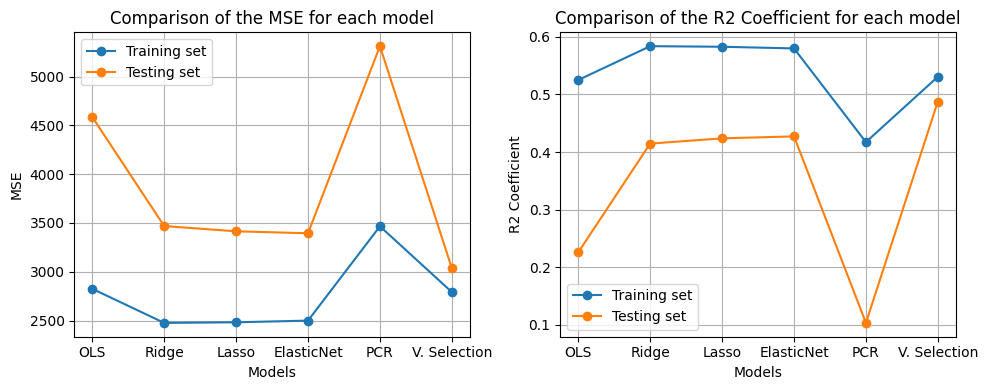

In [45]:
plt.figure(figsize=(10, 4))

# Plotting the MSE for each model
plt.subplot(1, 2, 1)
plt.plot(['OLS', 'Ridge', 'Lasso', 'ElasticNet', 'PCR', 'V. Selection'], [ols_train_errors[0], ridge_train_errors[0], lasso_train_errors[0], elasticnet_train_errors[0], pcr_train_errors[0], variable_selection_train_errors[0]], 'o-')
plt.plot(['OLS', 'Ridge', 'Lasso', 'ElasticNet', 'PCR', 'V. Selection'], [ols_test_errors[0], ridge_test_errors[0], lasso_test_errors[0], elasticnet_test_errors[0], pcr_test_errors[0], variable_selection_test_errors[0]], 'o-')
plt.xlabel('Models')
plt.ylabel('MSE')
plt.legend(['Training set', 'Testing set'])
plt.title('Comparison of the MSE for each model')
plt.grid(True)  # Add grid

# Plotting the R2 coefficient for each model
plt.subplot(1, 2, 2)
plt.plot(['OLS', 'Ridge', 'Lasso', 'ElasticNet', 'PCR', 'V. Selection'], [r2_score(y_train, ols.predict(X_train)), r2_score(y_train, ridge.predict(X_train)), r2_score(y_train, lasso.predict(X_train)), r2_score(y_train, elasticnet.predict(X_train)), r2_score(y_train, pca.predict(X_pca_k_train)), r2_score(y_train, variable_selection.predict(X_train_vs))], 'o-')
plt.plot(['OLS', 'Ridge', 'Lasso', 'ElasticNet', 'PCR', 'V. Selection'], [r2_score(y_test, ols.predict(X_test)), r2_score(y_test, ridge.predict(X_test)), r2_score(y_test, lasso.predict(X_test)), r2_score(y_test, elasticnet.predict(X_test)), r2_score(y_test, y_pred), r2_score(y_test, variable_selection.predict(X_test_vs))], 'o-')
plt.xlabel('Models')
plt.ylabel('R2 Coefficient')
plt.legend(['Training set', 'Testing set'])
plt.title('Comparison of the R2 Coefficient for each model')
plt.grid(True)  # Add grid

plt.tight_layout()

plt.show()

### Model Comparison Analysis

*Model evaluation should consider both training and testing performance to avoid overfitting.*

#### MSE Comparison:
- **OLS (Ordinary Least Squares)**: Shows lower MSE on the training set but higher on the testing set, indicating potential overfitting to the training data.
- **Ridge, Lasso, and ElasticNet**: These regularization techniques show less discrepancies between training and testing MSE in contrast to OLS, suggesting they are mitigating overfitting effectively.
- **PCR (Principal Component Regression)**: Displays a significant gap in MSE, with higher values for the testing set. This may imply overfitting to the training data or loss of crucial information during dimensionality reduction.
- **Variable Selection**: Exhibits a small difference in MSE between training and testing sets, which indicates a model that generalizes well and is stable across different datasets.

#### R² Coefficient Comparison:
- **OLS**: Yields high R² values for the training data but experiences a drop in the testing set, possibly indicating overfitting.
- **Ridge, Lasso, and ElasticNet**: Show consistent R² values between the training and testing sets, reflecting their ability to build robust models against overfitting.
- **PCR**: Has a high R² for the training set but much lower for the testing set, suggesting that the model may be capturing noise rather than underlying patterns.
- **Variable Selection**: Presents the most consistent R² values across training and testing sets, suggesting effective feature selection that captures the essence of the data.

#### Additional Insights:
- **Regularization Effect**: The regularization in Ridge, Lasso, and ElasticNet helps prevent overfitting by penalizing large coefficients, which can improve the model's performance on unseen data. They have slight differences between them either.
- **Dimensionality Reduction**: PCR's strategy of dimensionality reduction might discard informative features, which necessitates careful selection of components to retain.
- **Feature Selection**: The Variable Selection method selects statistically significant features, potentially leading to simpler, more interpretable models that generalize well.